In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_gen = ImageDataGenerator(
    rescale=1/255.0,
    horizontal_flip=True)

train_generator = train_gen.flow_from_directory(
    "/content/drive/My Drive/mask dataset/train",
    target_size=(224,224),
    color_mode="rgb",
    batch_size = 32,
    class_mode='binary'
)

Found 1315 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'mask': 0, 'no mask': 1}

In [7]:
reverse_dict = { 0 : 'mask', 1 :'no mask' }

In [8]:
reverse_dict.items()

dict_items([(0, 'mask'), (1, 'no mask')])

In [9]:
test_gen = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True)

test_generator = test_gen.flow_from_directory(
    "/content/drive/My Drive/mask dataset/test",
    target_size=(224,224),
    color_mode="rgb",
    batch_size = 32,
    class_mode='binary'
)

Found 194 images belonging to 2 classes.


In [10]:
def draw_image(img,label):
    plt.style.use("seaborn")
    plt.title(reverse_dict[label])
    plt.imshow(img)
    plt.show()

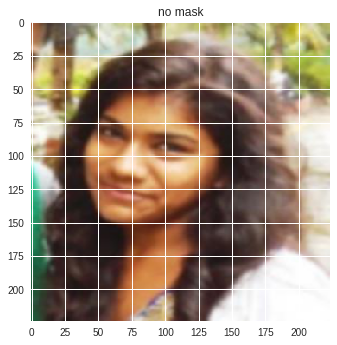

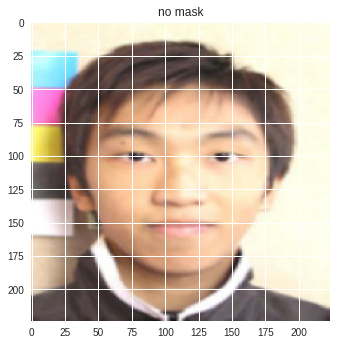

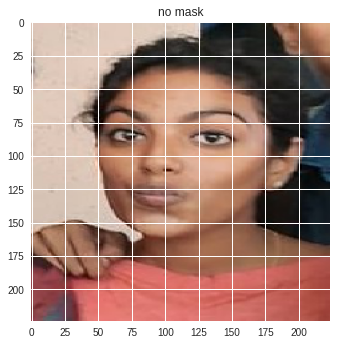

In [11]:
x,y = train_generator.next()
for i in range(3):
    draw_image(x[i],y[i])

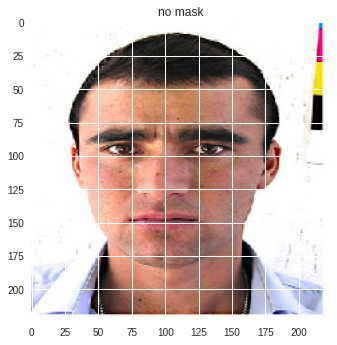

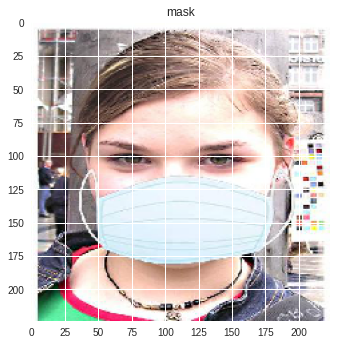

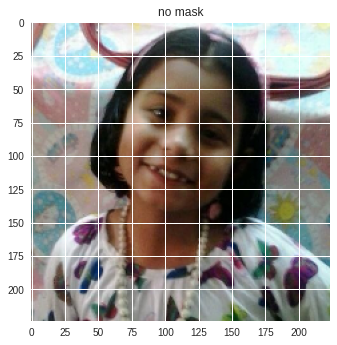

In [12]:
x,y = test_generator.next()
for i in range(3):
    draw_image(x[i],y[i])

# CNN Model

In [99]:
from keras.applications import MobileNetV2
from keras.layers import *
from keras.optimizers import Adam

# Keras API
from keras.models import Model

In [100]:
model = MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [101]:
gap1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(64,activation='relu')(gap1)
fc2 = Dense(1,activation='sigmoid')(fc1)

In [102]:
model_new = Model(inputs=model.input,outputs=fc2)

In [103]:
for ix in range(153):
    model_new.layers[ix].trainable= False

In [104]:
adam = Adam(lr=0.00005)

In [105]:
model_new.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [106]:
model_new.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [107]:
from keras.callbacks import ModelCheckpoint

In [108]:
checkpoint = ModelCheckpoint("/content/drive/My Drive/mask dataset/mask_detector.hdf5",monitor='val_loss',save_best_only=True)

hist = model_new.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 5,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks=[checkpoint]
)

Epoch 1/5
42/42 [==============================] - 11s 269ms/step - loss: 0.5138 - accuracy: 0.8068 - val_loss: 0.4090 - val_accuracy: 0.7732
Epoch 2/5
42/42 [==============================] - 10s 245ms/step - loss: 0.2620 - accuracy: 0.9544 - val_loss: 0.2453 - val_accuracy: 0.9278
Epoch 3/5
42/42 [==============================] - 10s 249ms/step - loss: 0.1560 - accuracy: 0.9787 - val_loss: 0.1425 - val_accuracy: 0.9588
Epoch 4/5
42/42 [==============================] - 11s 251ms/step - loss: 0.1121 - accuracy: 0.9802 - val_loss: 0.1137 - val_accuracy: 0.9588
Epoch 5/5
42/42 [==============================] - 10s 247ms/step - loss: 0.0865 - accuracy: 0.9848 - val_loss: 0.0902 - val_accuracy: 0.9794
